<font color='blue'><p>
## Exercise #2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline
import platform

import gc  # garbage collection
from sklearn.cluster import KMeans  # k-means 군집분석
from sklearn.metrics import silhouette_score  # 군집분석 평가를 위한 silhouette 값 계산

%pylab inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

your_os = platform.system()
if your_os == 'Linux':
    rc('font', family='NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    rc('font', family=font_name)
elif your_os == 'Darwin':
    rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)

Populating the interactive namespace from numpy and matplotlib


사용되는 데이터는 아래와 같이 읽고 합병했다고 가정.
```
cs = pd.read_csv('../+Use Cases/L사_고객정보.csv')
gd = pd.read_csv('../+Use Cases/L사_상품정보.csv')
tr = pd.read_csv('../+Use Cases/L사_거래정보.csv')

gd.pd_c = gd.pd_c.astype(str).str.zfill(4) 
df = pd.merge(tr, cs).merge(gd, on='pd_c')
df.de_dt = df.de_dt.astype(str).astype('datetime64')
```

In [2]:
cs = pd.read_csv('L사_고객정보.csv')
gd = pd.read_csv('L사_상품정보.csv')
tr = pd.read_csv('L사_거래정보.csv')

gd.pd_c = gd.pd_c.astype(str).str.zfill(4) 
df = pd.merge(tr, cs).merge(gd, on='pd_c')
df.de_dt = df.de_dt.astype(str).astype('datetime64')

**[문제 1, 9점]** 모닝과 소나타가 자동차 경주를 하는데 모닝의 속도는 시속 110Km이고, 소나타의 속도는 시속 50Km이다. 소나타는 모닝보다 500m 앞에서 출발한다. 출발 후 50초 동안 매초마다 두 자동차가 이동한 거리를 계산하여 각각 list로 저장하는 프로그램(미완성)은 다음과 같다.
```
morningDis = [??]
sonataDis = [??]
for sec in range(1, ??) :
    morningDis.append(110 * 1000/3600 * sec)
    sonataDis.append(500 + 50*1000/3600 * sec)
``` 
위 프로그램을 활용하여 두 자동차의 이동거리를 다음과 같은 형태의 Line Chart로 도식하시오. 단, x축과 y축 이름을 각각 sec와 distance로 할 것.  

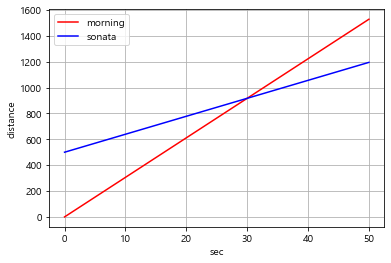

In [6]:
morningDis = []
sonataDis = []
for sec in range(1, 51) :
    morningDis.append(110 * 1000/3600 * sec)
    sonataDis.append(500 + 50*1000/3600 * sec)

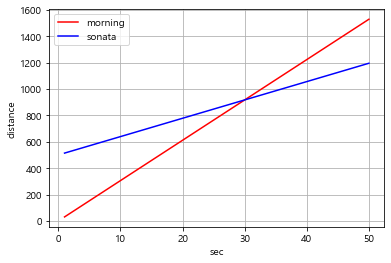

In [10]:
plt.plot(range(1,51), morningDis, label='morning' ,color="red")
plt.plot(range(1,51), sonataDis, label='sonata' , color="blue" )
plt.xlabel("sec")
plt.ylabel('distance')
plt.grid(True)
plt.legend()
plt.show()

**[문제 2, 7점]** 요일별 판매량(buy_ct의 합)을 계산한 후 아래와 같은 형태의 Bar Chart를 도식하시오. 단, 요일이 숫자가 아닌 우리말(월 ~ 일)로 표시할 경우 2점 추가. 

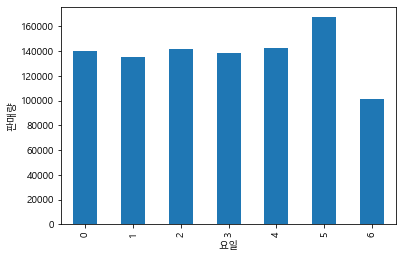

In [3]:
df.head(2)

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct,clnt_gender,clnt_age,clac_nm1,clac_nm2,clac_nm3
0,21922,104999,3,A03,0182,2019-09-20,12:41,10900,1,F,50,Chilled Foods,Chilled Instant Foods,Chilled Soups
1,39423,105124,10,A03,0182,2019-09-20,17:26,21800,2,F,50,Chilled Foods,Chilled Instant Foods,Chilled Soups


In [4]:
df["day"] = df.de_dt.dt.weekday
df.head()

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct,clnt_gender,clnt_age,clac_nm1,clac_nm2,clac_nm3,day
0,21922,104999,3,A03,0182,2019-09-20,12:41,10900,1,F,50,Chilled Foods,Chilled Instant Foods,Chilled Soups,4
1,39423,105124,10,A03,0182,2019-09-20,17:26,21800,2,F,50,Chilled Foods,Chilled Instant Foods,Chilled Soups,4
2,39423,89469,2,A03,0182,2019-09-01,03:32,25800,2,F,50,Chilled Foods,Chilled Instant Foods,Chilled Soups,6
3,39423,88436,1,A03,0182,2019-08-30,17:15,25800,2,F,50,Chilled Foods,Chilled Instant Foods,Chilled Soups,4
4,18362,50872,3,A03,0182,2019-07-15,09:46,31600,4,F,40,Chilled Foods,Chilled Instant Foods,Chilled Soups,0


In [10]:
m1 = df.groupby("day").buy_ct.sum().reset_index()
m1

,day,buy_ct
0,0,140179
1,1,135282
2,2,141815
3,3,138413
4,4,142159
5,5,167350
6,6,101349


In [11]:
m1 = m1.set_index('day')
m1

,buy_ct
day,
0,140179
1,135282
2,141815
3,138413
4,142159
5,167350
6,101349


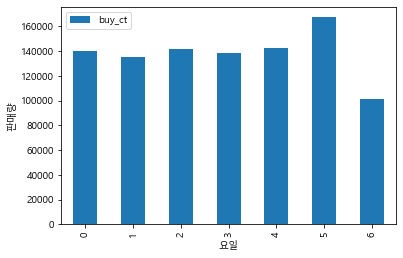

In [12]:
m1.plot.bar()
plt.xlabel("요일")
plt.ylabel("판매량")
plt.show()

In [22]:
m1 = df.groupby("day").buy_ct.sum().reset_index()
m1

,day,buy_ct
0,0,140179
1,1,135282
2,2,141815
3,3,138413
4,4,142159
5,5,167350
6,6,101349


In [23]:
m1.day = m1.day.apply(lambda x: ('월','화','수','목','금','토','일')[x])
m1 = m1.set_index('day')

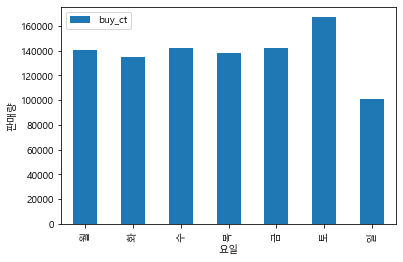

In [26]:
m1.plot.bar()
plt.xlabel("요일")
plt.ylabel("판매량")
plt.show()

**[문제 3, 5점]** seaborn의 countplot을 이용하여 상품(대분류)별 빈도를 아래와 같이 시각화하시오. 단, 모든 상품명이 명확히 보여야 함.

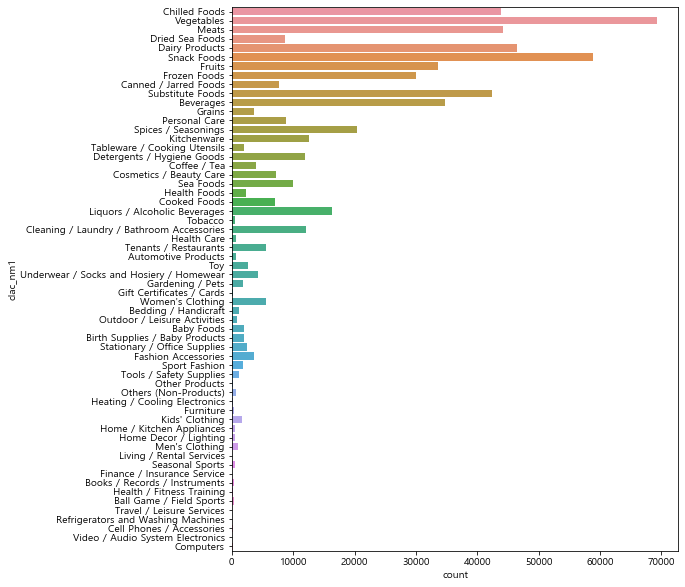

In [9]:
df.head(1)

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct,clnt_gender,clnt_age,clac_nm1,clac_nm2,clac_nm3
0,21922,104999,3,A03,0182,2019-09-20,12:41,10900,1,F,50,Chilled Foods,Chilled Instant Foods,Chilled Soups


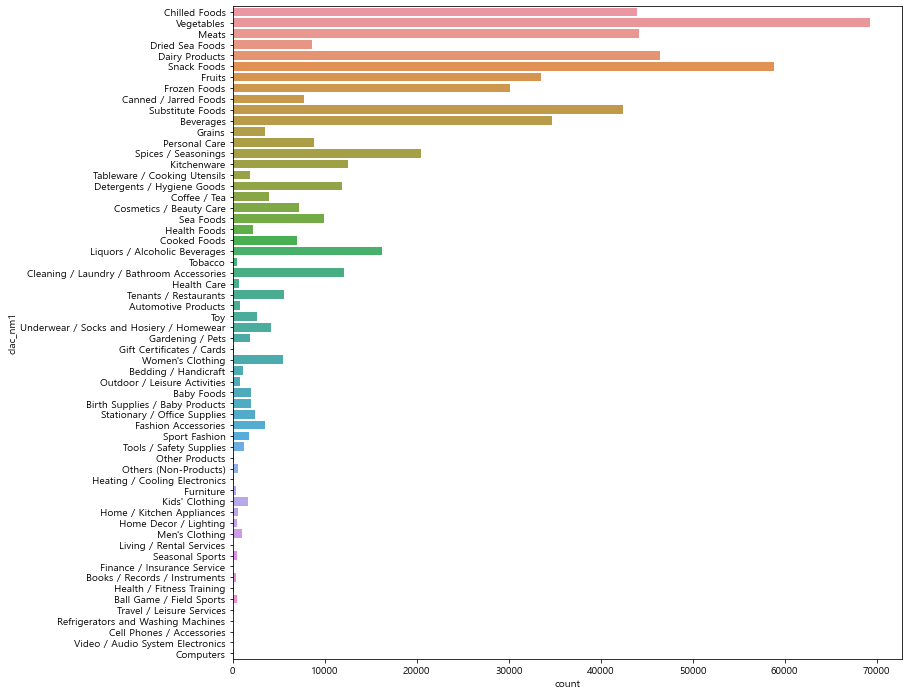

In [8]:
plt.figure(figsize(12,12))
sns.countplot(y="clac_nm1", data = df)
plt.show()

**[문제 4, 8점]** 고객별로 최소구매액과 방문일수를 구한 후 아래와 같은 pairplot을 도식하시오.

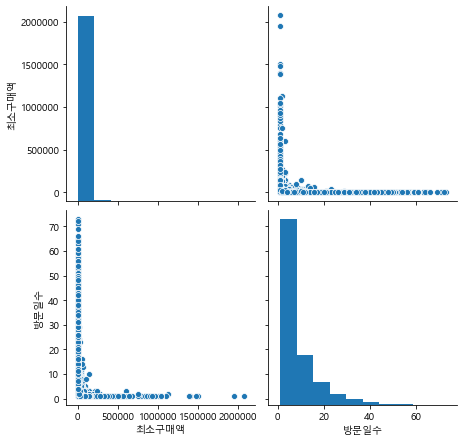

In [27]:
features = pd.DataFrame({'clnt_id': df.clnt_id.unique()})

In [28]:
f = df.groupby('clnt_id')['buy_am'].agg([
   ('최소구매액', np.min)
]).reset_index()
features = features.merge(f, how='left'); features.head(1)

,clnt_id,최소구매액
0,21922,900


In [29]:
f = df.groupby('clnt_id')['de_dt'].agg([
    ('방문일수',lambda x: x.nunique())]).reset_index()
features = features.merge(f, how='left'); features.head(1)

,clnt_id,최소구매액,방문일수
0,21922,900,5


In [31]:
features = features.set_index('clnt_id')

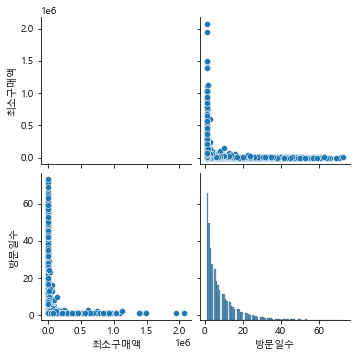

In [32]:
sns.pairplot(data=features.iloc[:,:])
plt.show()

**[문제 5, 8점]** 판매상품(대분류) `Computers`와 `Sport Fashion`의 가격 분포도(seaborn의 distplot)를 아래와 같이 도식하시오. *Hint: x축의 제목은 axes의 set_xlabel()로 지정.*

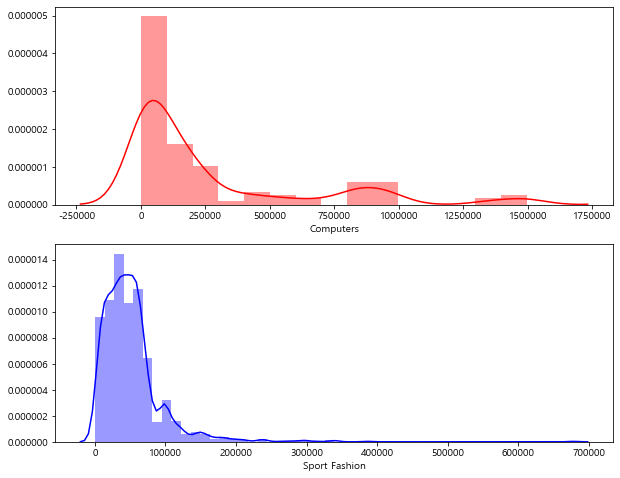

In [43]:
df.head(2)

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct,clnt_gender,clnt_age,clac_nm1,clac_nm2,clac_nm3
0,21922,104999,3,A03,0182,2019-09-20,12:41,10900,1,F,50,Chilled Foods,Chilled Instant Foods,Chilled Soups
1,39423,105124,10,A03,0182,2019-09-20,17:26,21800,2,F,50,Chilled Foods,Chilled Instant Foods,Chilled Soups


In [46]:
df = df.query('clac_nm1 == "Coumputer" or clac_nm1 == "Sport Fashion"')

In [48]:
df.head(2)

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct,clnt_gender,clnt_age,clac_nm1,clac_nm2,clac_nm3
482298,44662,64972,1,A02,1305,2019-07-31,00:21,75050,1,F,40,Sport Fashion,Women's General Sport Clothing,Women's Sport Jumpers / Jackets
482299,44662,64982,1,A02,1305,2019-07-31,00:47,58000,1,F,40,Sport Fashion,Women's General Sport Clothing,Women's Sport Jumpers / Jackets


**[문제 6, 7점]** 판매건수(buy_ct의 합이 아님) 기준 Top-10 상품(소분류 기준)에 대해 아래와 같은 형태의 Pie Chart로 도식하시오. 단, figsize는 7x7로 하고 autopct는 소수점 1자리 퍼센트로 설정할 것.

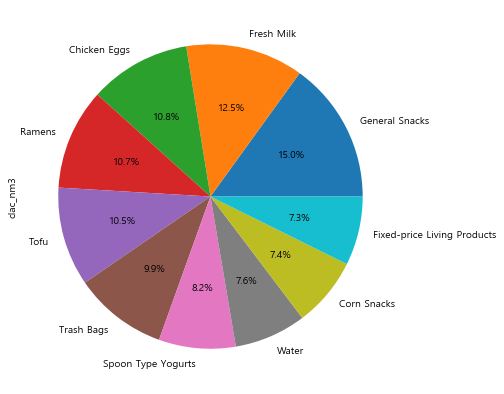

In [151]:
cs = pd.read_csv('L사_고객정보.csv')
gd = pd.read_csv('L사_상품정보.csv')
tr = pd.read_csv('L사_거래정보.csv')

gd.pd_c = gd.pd_c.astype(str).str.zfill(4) 
df = pd.merge(tr, cs).merge(gd, on='pd_c')
df.de_dt = df.de_dt.astype(str).astype('datetime64')

In [152]:
df.head(2)

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct,clnt_gender,clnt_age,clac_nm1,clac_nm2,clac_nm3
0,21922,104999,3,A03,0182,2019-09-20,12:41,10900,1,F,50,Chilled Foods,Chilled Instant Foods,Chilled Soups
1,39423,105124,10,A03,0182,2019-09-20,17:26,21800,2,F,50,Chilled Foods,Chilled Instant Foods,Chilled Soups


In [133]:
a = df.groupby("clac_nm3").buy_am.size().reset_index().sort_values(by='buy_am', ascending=False).head(10)
a.set_index("clac_nm3", inplace=True)

In [134]:
a

,buy_am
clac_nm3,
General Snacks,15518
Fresh Milk,12914
Chicken Eggs,11115
Ramens,11083
Tofu,10850
Trash Bags,10254
Spoon Type Yogurts,8417
Water,7882
Corn Snacks,7610


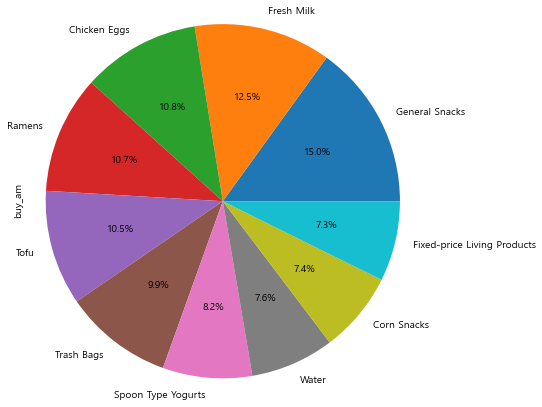

In [135]:
a.buy_am.plot.pie(autopct='%.1f%%', figsize=(7,7))
plt.axis('equal')
plt.show()

**[문제 7, 7점]** 아래와 같은 Heatmap를 도식하시오.

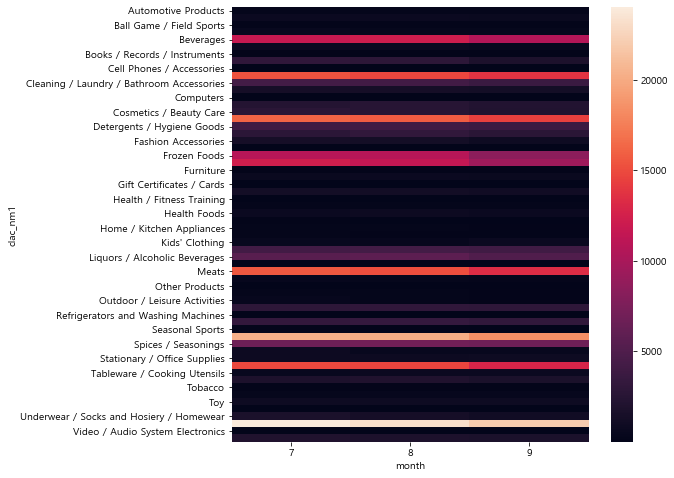

In [34]:
df.head()

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct,clnt_gender,clnt_age,clac_nm1,clac_nm2,clac_nm3,day
0,21922,104999,3,A03,0182,2019-09-20,12:41,10900,1,F,50,Chilled Foods,Chilled Instant Foods,Chilled Soups,4
1,39423,105124,10,A03,0182,2019-09-20,17:26,21800,2,F,50,Chilled Foods,Chilled Instant Foods,Chilled Soups,4
2,39423,89469,2,A03,0182,2019-09-01,03:32,25800,2,F,50,Chilled Foods,Chilled Instant Foods,Chilled Soups,6
3,39423,88436,1,A03,0182,2019-08-30,17:15,25800,2,F,50,Chilled Foods,Chilled Instant Foods,Chilled Soups,4
4,18362,50872,3,A03,0182,2019-07-15,09:46,31600,4,F,40,Chilled Foods,Chilled Instant Foods,Chilled Soups,0


In [35]:
df["month"] = df["de_dt"].dt.month
df.head()

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct,clnt_gender,clnt_age,clac_nm1,clac_nm2,clac_nm3,day,month
0,21922,104999,3,A03,0182,2019-09-20,12:41,10900,1,F,50,Chilled Foods,Chilled Instant Foods,Chilled Soups,4,9
1,39423,105124,10,A03,0182,2019-09-20,17:26,21800,2,F,50,Chilled Foods,Chilled Instant Foods,Chilled Soups,4,9
2,39423,89469,2,A03,0182,2019-09-01,03:32,25800,2,F,50,Chilled Foods,Chilled Instant Foods,Chilled Soups,6,9
3,39423,88436,1,A03,0182,2019-08-30,17:15,25800,2,F,50,Chilled Foods,Chilled Instant Foods,Chilled Soups,4,8
4,18362,50872,3,A03,0182,2019-07-15,09:46,31600,4,F,40,Chilled Foods,Chilled Instant Foods,Chilled Soups,0,7


In [36]:
mon = df.query('month == 7 or month == 8 or month == 9')

In [37]:
mon.head(3)

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct,clnt_gender,clnt_age,clac_nm1,clac_nm2,clac_nm3,day,month
0,21922,104999,3,A03,0182,2019-09-20,12:41,10900,1,F,50,Chilled Foods,Chilled Instant Foods,Chilled Soups,4,9
1,39423,105124,10,A03,0182,2019-09-20,17:26,21800,2,F,50,Chilled Foods,Chilled Instant Foods,Chilled Soups,4,9
2,39423,89469,2,A03,0182,2019-09-01,03:32,25800,2,F,50,Chilled Foods,Chilled Instant Foods,Chilled Soups,6,9


In [59]:
hi = pd.pivot_table(mon, index="clac_nm1", columns='month', values='buy_ct', aggfunc=np.sum, fill_value=0)
hi.head(3)

month,7,8,9
clac_nm1,,,
Automotive Products,250,295,279
Baby Foods,887,931,888
Ball Game / Field Sports,2823,1798,2148


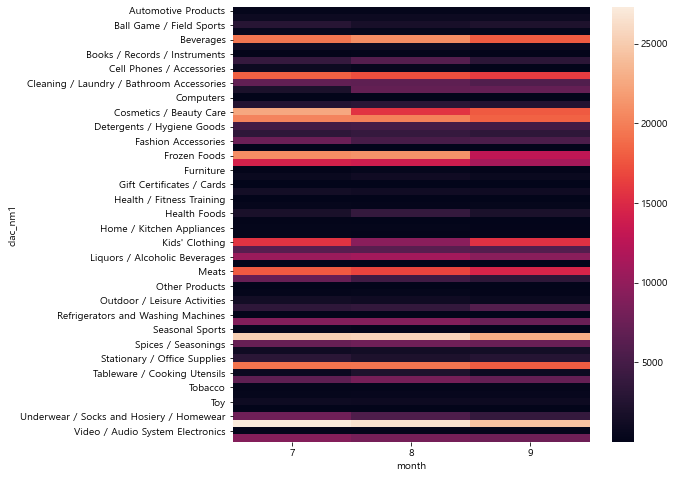

In [60]:
plt.figure(figsize=(8,8))
sns.heatmap(hi)
plt.show()